538 806


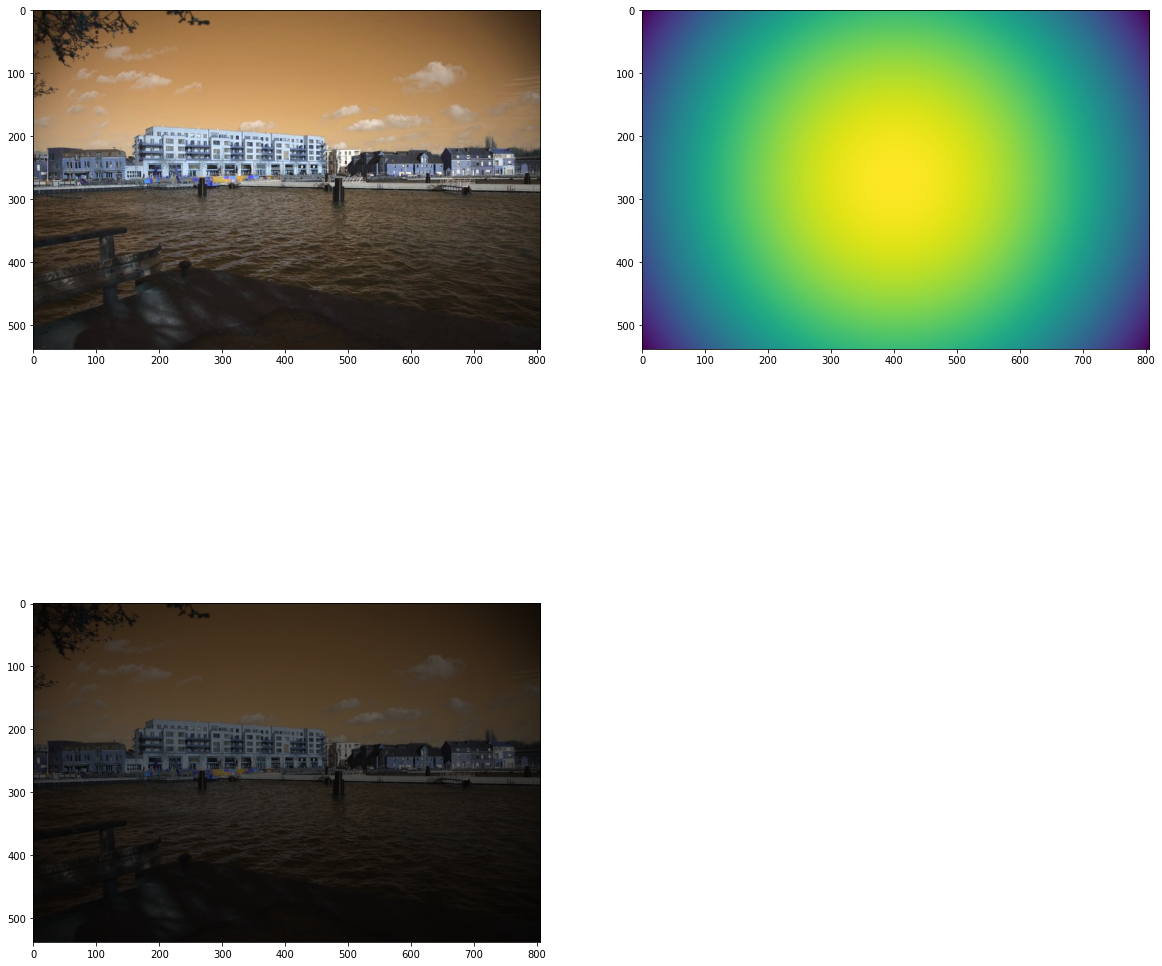

In [1]:
#####VIGNETTE
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img2.jpg')
height, width = img.shape[:2]
print(height,width)
original = img.copy()
# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(width, 1000)
# print(kernel_x.shape)
kernel_y = cv2.getGaussianKernel(height, 1000)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
# print(mask)
# applying the mask to each channel in the input image
for i in range(3):
    img[:, :, i] = img[:, :, i] * mask

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv = np.array(hsv, dtype = np.float64)
hsv[:,:,1] = hsv[:,:,1]*1.3 ## scale pixel values up or down for channel 1(Lightness)
hsv[:,:,1][hsv[:,:,1]>255]  = 255
hsv[:,:,2] = hsv[:,:,2]*4.5 ## scale pixel values up or down for channel 1(Lightness)
hsv[:,:,2][hsv[:,:,2]>255]  = 255
hsv = np.array(hsv, dtype = np.uint8)
test = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# hsv[:,:,2] = cv2.add(hsv[:,:,2], 100)


test = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(original)
plt.subplot(2, 2, 2)
plt.imshow(mask)
plt.subplot(2, 2, 3)
plt.imshow(img)
plt.show()    
    
cv2.imshow('Original', original)
cv2.imshow('Vignette', img)
# cv2.imshow('masking', mask)
cv2.imshow('output', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('img2.jpg')

src_pts = np.float32([[50,50], [200,50], [50,200], [200,200]])
dst_pts = np.float32([[100,0], [300,78], [0,300], [300,300]])

projective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
projective_img = cv2.warpPerspective(img, projective_matrix, (img.shape[1], img.shape[0]))
 
mask = np.zeros(img.shape[:2], dtype=np.float64)
center_coordinates = (img.shape[1]//2, img.shape[0]//2)
axes_length = (img.shape[1]//3, img.shape[0]//3)
angle = 0
start_angle = 0
end_angle = 360
color = (255, 255, 255)
thickness = -1
cv2.ellipse(mask, center_coordinates, axes_length, angle, start_angle, end_angle, color, thickness)

mask = cv2.normalize(mask, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F) 
kernel_size = max(img.shape[0], img.shape[1])
kernel = cv2.getGaussianKernel(kernel_size, 0)
kernel = kernel * kernel.T
# kernel_x = cv2.getGaussianKernel(width, 1000)
# # print(kernel_x.shape)
# kernel_y = cv2.getGaussianKernel(height, 1000)
# kernel = kernel_y * kernel_x.T
# mask = 255 * kernel / np.linalg.norm(kernel)


mask = cv2.filter2D(mask, -1, kernel)
print(mask.shape)
mask = cv2.merge([mask, mask, mask])
print(mask.shape)
result = projective_img * mask


result = cv2.convertScaleAbs(result)
cv2.imshow('output_image.jpg', result)
cv2.imshow('Transformed Image', projective_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(538, 806)
(538, 806, 3)
